# Hepatitis C Detection dengan Support Vector Machine

https://www.kaggle.com/datasets/fedesoriano/hepatitis-c-dataset

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec 
from matplotlib.animation import FuncAnimation
import seaborn as sns
import pandas as pd
import timeit

from sklearn.model_selection import KFold # Library untuk penerapan KFold Validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score # Library untuk menampilkan nilai pengujian Cross Validation (nilai return nya berupa array)
from sklearn.model_selection import cross_validate # ...
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report # Menampilkan hasil tes
import warnings
warnings.filterwarnings('ignore')


> Memanggil Dataset

In [51]:
Hepatitis = pd.read_csv('data/HepatitisCdata.csv')
Hepatitis

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


> Mengcopy Dataset ke variabel baru

In [52]:
# Data Copy
Hepatitis1 = Hepatitis.copy()
Hepatitis1

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


# Visualisasi Data

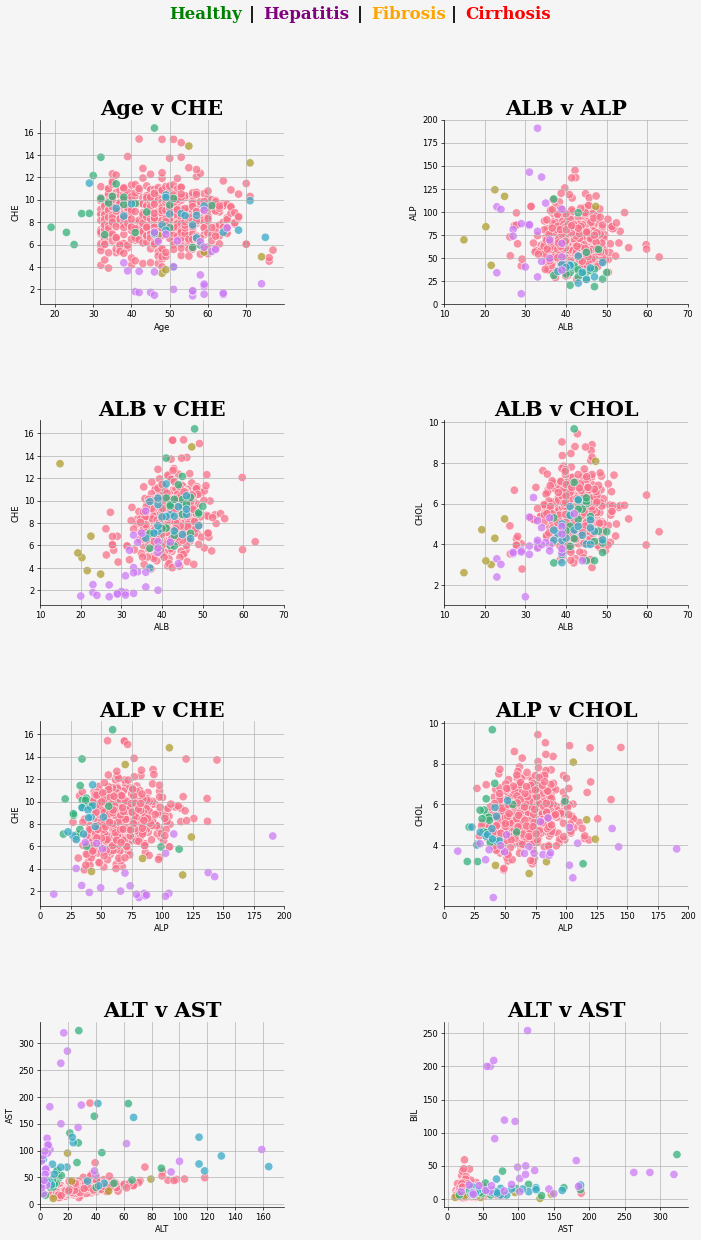

In [53]:
data = Hepatitis1.copy()
fig = plt.figure(figsize = (24,24), dpi = 60)
gs = GridSpec(ncols=13, nrows=29, left=0.05, right=0.5, wspace=0.2, hspace=0.1)
fig.patch.set_facecolor('#f5f5f5')
sns.set_palette(sns.color_palette(['green','purple', 'orange', 'red']))

ax1 = fig.add_subplot(gs[:5, :5])
ax2 = fig.add_subplot(gs[:5, 8:])
ax3 = fig.add_subplot(gs[8:13, :5])
ax4 = fig.add_subplot(gs[8:13, 8:])
ax5 = fig.add_subplot(gs[16:21, :5])
ax6 = fig.add_subplot(gs[16:21, 8:])
ax7 = fig.add_subplot(gs[24:, :5])
ax8 = fig.add_subplot(gs[24:, 8:])


# axes list
axes = [ ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]


for ax in axes:
    ax.set_facecolor('#f5f5f5')
    ax.grid()
    
    for loc in ['right', 'top']:
        ax.spines[loc].set_visible(False)
        

#-------------------------------------------------------------------------------
#ax1 Age v CHE
sns.scatterplot(x='Age', y='CHE', hue='Category', data=data, ax=ax1, s=100, alpha=0.75, legend=None)
ax1.set_title('Age v CHE', {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
#-------------------------------------------------------------------------------
#ax2 ALB v ALP
sns.scatterplot(x='ALB', y='ALP', hue='Category', data=data, ax=ax2, s=100, alpha=0.75, legend=None)
ax2.set_title('ALB v ALP', {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
ax2.set_xlim(10, 70)
ax2.set_ylim(0,200)
#-------------------------------------------------------------------------------
#ax3 ALB v CHE
sns.scatterplot(x='ALB', y='CHE', hue='Category', data=data, ax=ax3, s=100, alpha=0.75, legend=None)
ax3.set_title('ALB v CHE', {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
ax3.set_xlim(10, 70)
#-------------------------------------------------------------------------------
#ax4 ALB v CHOL
sns.scatterplot(x='ALB', y='CHOL', hue='Category', data=data, ax=ax4, s=100, alpha=0.75, legend=None)
ax4.set_title('ALB v CHOL', {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
ax4.set_xlim(10, 70)
#-------------------------------------------------------------------------------
#ax5 ALP v CHE
sns.scatterplot(x='ALP', y='CHE', hue='Category', data=data, ax=ax5, s=100, alpha=0.75, legend=None)
ax5.set_title('ALP v CHE', {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
ax5.set_xlim(0, 200)
#-------------------------------------------------------------------------------
#ax6 ALP v CHOL
sns.scatterplot(x='ALP', y='CHOL', hue='Category', data=data, ax=ax6, s=100, alpha=0.75, legend=None)
ax6.set_title('ALP v CHOL', {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
ax6.set_xlim(0, 200)
#-------------------------------------------------------------------------------
#ax7 ALT v AST
sns.scatterplot(x='ALT', y='AST', hue='Category', data=data, ax=ax7, s=100, alpha=0.75, legend=None)
ax7.set_title('ALT v AST', {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
ax7.set_xlim(0, 175)
#-------------------------------------------------------------------------------
#ax8 AST v BIL
sns.scatterplot(x='AST', y='BIL', hue='Category', data=data, ax=ax8, s=100, alpha=0.75, legend=None)
ax8.set_title('ALT v AST', {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
#ax8.set_xlim(0, 175)


#-------------------------------------------
fig.text(0.1 + 0.04, 0.95, "Healthy", 
         {'font':'Serif', 'weight':'bold','color': 'green', 'size':20})
fig.text(0.155 + 0.04, 0.95, "|", 
         {'font':'Serif', 'weight':'bold','color': 'black', 'size':20})
fig.text(0.165 + 0.04, 0.95, "Hepatitis", 
         {'font':'Serif', 'weight':'bold','color': 'purple', 'size':20})
fig.text(0.23 + 0.04, 0.95, "|", 
         {'font':'Serif', 'weight':'bold','color': 'black', 'size':20})
fig.text(0.24 + 0.04, 0.95, "Fibrosis", 
         {'font':'Serif', 'weight':'bold','color': 'orange', 'size':20})
fig.text(0.295 + 0.04, 0.95, "|", 
         {'font':'Serif', 'weight':'bold','color': 'black', 'size':20})
fig.text(0.305 + 0.04, 0.95, "Cirrhosis", 
         {'font':'Serif', 'weight':'bold','color': 'red', 'size':20})

plt.show()

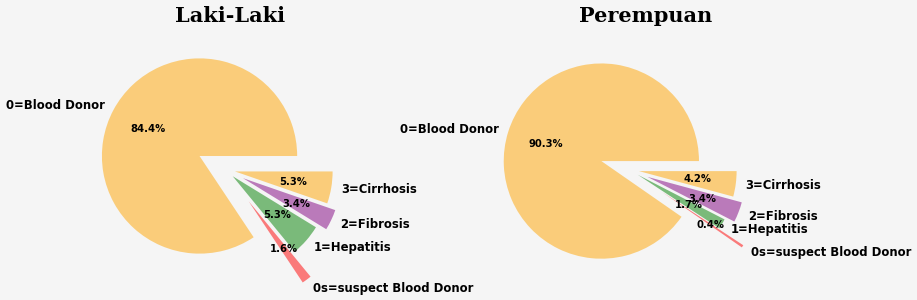

In [54]:
data = Hepatitis1.copy()
fig = plt.figure(figsize = (24,10), dpi = 60)
gs = GridSpec(ncols=13, nrows=5, left=0.05, right=0.5, wspace=0.2, hspace=0.1)
fig.patch.set_facecolor('#f5f5f5')
sns.set_palette(sns.color_palette(['green','purple', 'orange', 'red']))

ax1 = fig.add_subplot(gs[:, 0:5])
ax2 = fig.add_subplot(gs[:, 8:])

axes = [ ax1,ax2]

for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f5f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

#------------------------------------------------------------    
#ax1
ax1_plot = ax1.pie(data[data.Sex == 'm'].groupby('Category').Category.count().values, 
                    labels=data.groupby('Category').Category.count().index,
                    autopct='%1.1f%%', explode=[0.3,  0.4, 0.1, 0.2, 0.1], 
                    colors=['orange', 'red', 'green', 'purple'])

for piece in ax1_plot[0]:
    piece.set_alpha(0.5)

for i, text in enumerate(ax1_plot[1]):
    text.set_weight('bold')
    text.set_size(14)

for i, text in enumerate(ax1_plot[2]):
    text.set_weight('bold')
    text.set_size(12)

    
fig.text(0.1, 0.75, 'Laki-Laki',  {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
#------------------------------------------------------------    
#ax2
ax2_plot = ax2.pie(data[data.Sex == 'f'].groupby('Category').Category.count().values, 
                    labels=data.groupby('Category').Category.count().index,
                    autopct='%1.1f%%', explode=[0.3,  0.4, 0.1, 0.2,0.1], 
                    colors=['orange', 'red', 'green', 'purple'])

for piece in ax2_plot[0]:
    piece.set_alpha(0.5)

for i, text in enumerate(ax2_plot[1]):
    text.set_weight('bold')
    text.set_size(14)

for i, text in enumerate(ax2_plot[2]):
    text.set_weight('bold')
    text.set_size(12)

fig.text(0.38, 0.75, 'Perempuan',  {'font':'Serif', 'weight':'bold','color': 'black', 'size':25}) 
#--------------------------------
plt.show()

# Preprocessing

In [55]:
# Hapus kolom unnamed, karena tidak digunakan
Hepatitis1 = Hepatitis1.drop(columns = 'Unnamed: 0')
Hepatitis1

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [56]:
Hepatitis1.shape

(615, 13)

In [57]:
Hepatitis1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [58]:
Hepatitis1.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


> Memisah kolom category 

In [59]:
Hepatitis1[["Label", "Category"]] = (  
    Hepatitis1["Category"]           
    .str                         
    .split("=", expand=True)                               
)

> Mengubah nilai pad fitur 'Sex' menjadi 1 untuk male dan 0 untuk female

In [60]:
Hepatitis1 = Hepatitis1.replace({'Sex' : {'m': 1, 'f': 0}})
Hepatitis1

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Label
0,Blood Donor,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0
1,Blood Donor,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0
2,Blood Donor,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0
3,Blood Donor,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0
4,Blood Donor,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,Cirrhosis,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,3
611,Cirrhosis,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,3
612,Cirrhosis,64,0,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,3
613,Cirrhosis,46,0,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,3


In [61]:
Hepatitis1.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
Label        0
dtype: int64

>Mengisi data Null dengan nilai rata rata

In [62]:
Hepatitis1.dropna(inplace=True)
Hepatitis1

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Label
0,Blood Donor,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0
1,Blood Donor,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0
2,Blood Donor,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0
3,Blood Donor,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0
4,Blood Donor,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,Cirrhosis,58,0,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6,3
609,Cirrhosis,59,0,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5,3
610,Cirrhosis,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,3
611,Cirrhosis,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,3


In [63]:
Hepatitis1.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
Label       0
dtype: int64

In [64]:
X = Hepatitis1.drop(['Category','Label'], axis=1)
y = Hepatitis1['Category']

# SVM

Untuk mengambil nilai dari masing-masing fold, maka menggunakan cross_val_score. Parameter sebagai berikut :
* estimator : metode klasifikasi yang digunakan untuk memprediksi
* x : fitur
* y : kelas
* scoring : nilai yang digunakan sebagai pengukuran evaluasi, diantaranya "accuracy", "precision", "recall"
* cv : metode cross validation yang digunakan

---
Sumber :
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
* https://scikit-learn.org/stable/modules/model_evaluation.html

In [65]:
start = timeit.default_timer()
# define kfold for cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=30)

In [66]:
# Klasifikasi SVM menggunakan Cross Validation
svm = SVC()

In [67]:
# membagi data menjadi data training:testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20)

In [68]:
cv_score_svm = cross_val_score(svm, X_train, y_train, cv=kfold, scoring="accuracy")

print('Nilai akurasi tiap fold: {}'.format(cv_score_svm))
print('Nilai akurasi rata-rata: {}'.format(cv_score_svm.mean()))

Nilai akurasi tiap fold: [0.94736842 0.92553191 0.92553191 0.92553191 0.88297872]
Nilai akurasi rata-rata: 0.9213885778275476


In [69]:

params = {
        'kernel': ['linear', 'poly', 'rbf']
        }

svm_classifierCV = GridSearchCV(SVC(), params, cv= kfold, scoring= 'accuracy')
svm_classifierCV.fit(X_train,y_train)

# print parameter terbaik
print('Parameter terbaik: {0} \ndengan nilai akurasi pada data training: {1}'.format(svm_classifierCV.best_params_, svm_classifierCV.best_score_))

Parameter terbaik: {'kernel': 'linear'} 
dengan nilai akurasi pada data training: 0.9426203807390816


In [70]:
pred = svm_classifierCV.predict(X_test)
print(classification_report(y_test, pred))
stop = timeit.default_timer()
print('Waktu eksekusi: ', stop - start)

                     precision    recall  f1-score   support

        Blood Donor       0.98      1.00      0.99       109
          Cirrhosis       0.67      0.67      0.67         3
           Fibrosis       0.00      0.00      0.00         2
          Hepatitis       0.00      0.00      0.00         2
suspect Blood Donor       0.00      0.00      0.00         2

           accuracy                           0.94       118
          macro avg       0.33      0.33      0.33       118
       weighted avg       0.92      0.94      0.93       118

Waktu eksekusi:  1.254171260000021


##### Repeated holdout

In [71]:
start2 = timeit.default_timer()
svm = SVC()
# untuk melakukan training, data harus disesuaikan dengan model, hal ini bisa dilakukan dengan menggunakan metode .fit (berlaku untuk semua model)
svm.fit(X_train, y_train)

# untuk mengetahui confusion matrix, bisa menggunakan library classification report dengan sebelumnya melakukan proses prediksi menggunakan metode .predict
predict = svm.predict(X_test)
print(classification_report(y_test, predict))
stop2 = timeit.default_timer()
print('Waktu eksekusi: ', stop2 - start2)

                     precision    recall  f1-score   support

        Blood Donor       0.97      1.00      0.99       109
          Cirrhosis       0.67      0.67      0.67         3
           Fibrosis       0.00      0.00      0.00         2
          Hepatitis       0.00      0.00      0.00         2
suspect Blood Donor       0.00      0.00      0.00         2

           accuracy                           0.94       118
          macro avg       0.33      0.33      0.33       118
       weighted avg       0.92      0.94      0.93       118

Waktu eksekusi:  0.030251782000050298


In [72]:
model = SVC(C=0.1, kernel='linear')
model.fit(X_train, y_train)

# Membuat prediksi
predictions = model.predict(X_test)


In [73]:
cm = confusion_matrix(y_test, predictions)
cm

array([[109,   0,   0,   0,   0],
       [  0,   2,   1,   0,   0],
       [  0,   0,   1,   1,   0],
       [  0,   1,   0,   1,   0],
       [  2,   0,   0,   0,   0]])

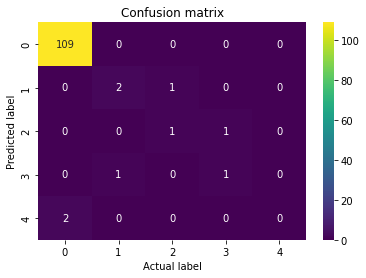

In [74]:
sns.heatmap(cm, annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()